# Generating a random cluster dataset 

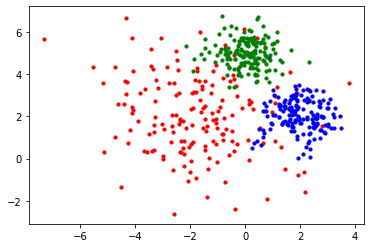

In [28]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

centers = [(-2, 2), (2, 2), (0, 5)]
cluster_std = [1.9, 0.7, 0.7]

X, y = make_blobs(n_samples=500, cluster_std = cluster_std, centers = centers, n_features=3, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")

In [2]:
X

array([[-0.73187397,  5.24869915],
       [ 2.58860309,  1.92797895],
       [ 1.66723899,  2.33432713],
       [-1.30956537,  2.14947373],
       [ 1.43380696,  2.39020762],
       [-1.187763  ,  2.2586449 ],
       [ 2.54965884,  1.53459256],
       [ 1.46288312,  2.47219949],
       [ 1.80278461,  3.43944887],
       [-0.67288452,  3.97917288],
       [-1.32668686,  5.06281038],
       [-0.82677222,  4.67804893],
       [ 0.74829018,  4.85317295],
       [-2.22569204,  1.73116195],
       [ 1.71185259,  2.89496966],
       [ 2.56619105,  3.25282828],
       [-3.9551595 ,  3.35627017],
       [ 1.3438546 ,  4.02581429],
       [-1.77667263,  1.82544074],
       [ 2.31589881,  0.82115801],
       [ 2.46317675,  2.69044653],
       [ 0.70557653,  5.27463444],
       [-1.7078886 ,  2.54933946],
       [-0.83813848,  2.51943091],
       [ 0.14636767,  6.0885112 ],
       [ 0.09807692,  4.00659586],
       [-2.1556297 ,  1.85946935],
       [-1.71755585,  2.41550497],
       [ 1.73763672,

In [3]:
y

array([2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 2, 0,
       1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2,

In [4]:
import pandas as pd
datax = pd.DataFrame(data = X)

In [5]:
datax['label'] = y

In [6]:
datax.columns

Index([0, 1, 'label'], dtype='object')

In [7]:
from math import dist

def range_query(df, a, eps):
    voisin = []
    for k in range(len(df)):
        
        a2 = (datax[0][a], datax[1][a])
        b = (datax[0][k], datax[1][k])

        if dist(a2,b) < eps:
            voisin.append(k)
    return(voisin)

range_query(datax, 0, 0.3)

[0, 54, 119, 190, 203, 218, 335, 499]

In [8]:
len(range_query(datax, 0, 0.3))

8

In [9]:
def compare(li, min_points):
    if len(li) < min_points:
        return True
    else: 
        False

In [10]:
def clusterisation(datax, k, neighbors, id_cluster, minpts, eps):
    
    datax['visitedornot'][k] = id_cluster
    
    i = 0
    while i < len(neighbors):
        next_point = neighbors[i]
        
        if datax['visitedornot'][next_point] == 'noise':
            datax['visitedornot'][next_point] = id_cluster
        
        elif datax['visitedornot'][next_point] == 'notvisited':
            
            datax['visitedornot'][next_point] = id_cluster 
            next_point_neighbor = range_query(datax, next_point, eps)
            
            if len(next_point_neighbor) >= minpts:
                neighbors = neighbors + next_point_neighbor
        i = i+1

In [11]:
def dbscan(datax, eps, minpts):
    
    id_cluster = 0
    
    for k in range(len(datax)):
        
        if datax['visitedornot'][k] != 'notvisited':
            continue
            
        neighbors = range_query(datax, k, 0.3)
        
        if compare(neighbors, minpts) == True:
            datax['visitedornot'][k] = 'noise'
                                
        else :
            id_cluster = id_cluster + 1
            clusterisation(datax, k, neighbors, id_cluster, minpts, eps)
                                
    return(datax['visitedornot'])
    

# Labelisation with our dbscan from scratch

In [12]:
datax['visitedornot'] = 'notvisited'

In [13]:
dbscan(datax, 0.5, 6)

<ipython-input-10-49822373b67d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][k] = id_cluster
<ipython-input-10-49822373b67d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][next_point] = id_cluster
<ipython-input-11-7df7440a95d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][k] = 'noise'


0      1
1      2
2      2
3      3
4      2
      ..
495    2
496    1
497    2
498    1
499    1
Name: visitedornot, Length: 500, dtype: object

In [14]:
datax['visitedornot'].unique()

array([1, 2, 3, 'noise'], dtype=object)

In [15]:
datax

,0,1,label,visitedornot
0,-0.731874,5.248699,2,1
1,2.588603,1.927979,1,2
2,1.667239,2.334327,1,2
3,-1.309565,2.149474,0,3
4,1.433807,2.390208,1,2
...,...,...,...,...
495,2.454051,2.075140,1,2
496,-0.648810,4.872306,2,1
497,2.315786,1.513555,1,2
498,0.852559,3.641523,2,1


## True label

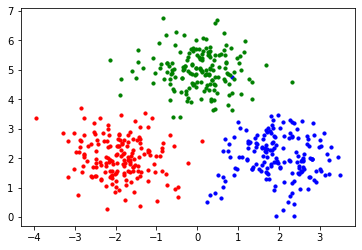

In [16]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")

## Predicted label with dbscan

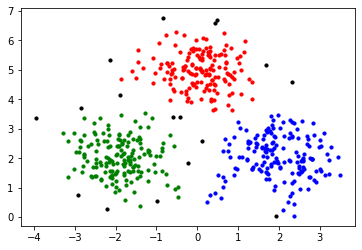

In [17]:
plt.scatter(datax[0][datax.visitedornot == 1], datax[1][datax.visitedornot == 1], color="red", s=10, label="Cluster1")
plt.scatter(datax[0][datax.visitedornot == 2], datax[1][datax.visitedornot == 2], color="blue", s=10, label="Cluster2")
plt.scatter(datax[0][datax.visitedornot == 3], datax[1][datax.visitedornot == 3], color="green", s=10, label="Cluster3")
plt.scatter(datax[0][datax.visitedornot == 'noise'], datax[1][datax.visitedornot == 'noise'], color="black", s=10, label="noise")

# Optimizing hyperparameter

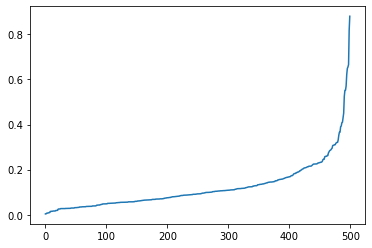

In [26]:
'''from sklearn.neighbors import NearestNeighbors
import numpy as np 

neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)'''

optimized epsilon = 0.3

In [23]:
datax['visitedornot'] = 'notvisited'

In [24]:
dbscan(datax, 0.3, 6)

<ipython-input-10-49822373b67d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][k] = id_cluster
<ipython-input-10-49822373b67d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][next_point] = id_cluster
<ipython-input-11-7df7440a95d4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax['visitedornot'][k] = 'noise'


0          1
1          2
2          2
3          3
4          2
       ...  
495        2
496        1
497        2
498    noise
499        1
Name: visitedornot, Length: 500, dtype: object

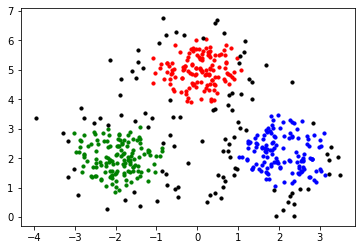

In [25]:
plt.scatter(datax[0][datax.visitedornot == 1], datax[1][datax.visitedornot == 1], color="red", s=10, label="Cluster1")
plt.scatter(datax[0][datax.visitedornot == 2], datax[1][datax.visitedornot == 2], color="blue", s=10, label="Cluster2")
plt.scatter(datax[0][datax.visitedornot == 3], datax[1][datax.visitedornot == 3], color="green", s=10, label="Cluster3")
plt.scatter(datax[0][datax.visitedornot == 'noise'], datax[1][datax.visitedornot == 'noise'], color="black", s=10, label="noise")